##  PRODIGY_DS_TASK04

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=pd.read_csv(r'C:\Users\Shreya Tripathy\Desktop\visual code\Microsoft VS Code\twitter_training.csv')
y=pd.read_csv(r'C:\Users\Shreya Tripathy\Desktop\visual code\Microsoft VS Code\twitter_validation.csv')

In [4]:
x.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
y.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
x.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [7]:
y.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [8]:
x.duplicated().sum(),y.duplicated().sum()

(2700, 0)

In [9]:
train_sentiment_distribution=x.iloc[:,2].value_counts()
validation_sentiment_distribution=y.iloc[:,2].value_counts()

In [10]:
unique_entities_train=x.iloc[:,1].nunique()
validation_sentiment_distribution,validation_sentiment_distribution,unique_entities_train

(Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32)

In [11]:
x_cleaned=x.drop_duplicates()

In [12]:
x_cleaned=x_cleaned.dropna(subset=[x.columns[3]])

In [13]:
remaining_duplicates_train=x_cleaned.duplicated().sum()
remaining_missing_train=x_cleaned.isnull().sum()
remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

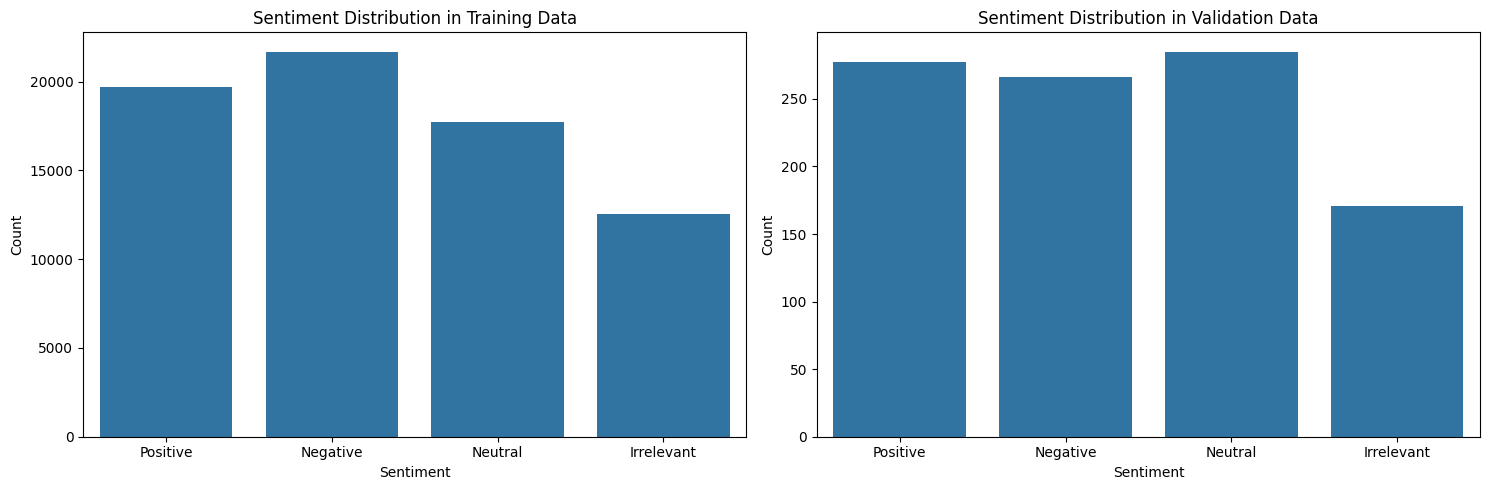

In [18]:
ig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.countplot(data=x_cleaned, x=x_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')


sns.countplot(data=y, x=y.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

In [15]:
x_cleaned['message_length'] = x_cleaned[x_cleaned.columns[3]].apply(len)
y['message_length'] = y[y.columns[3]].apply(len)

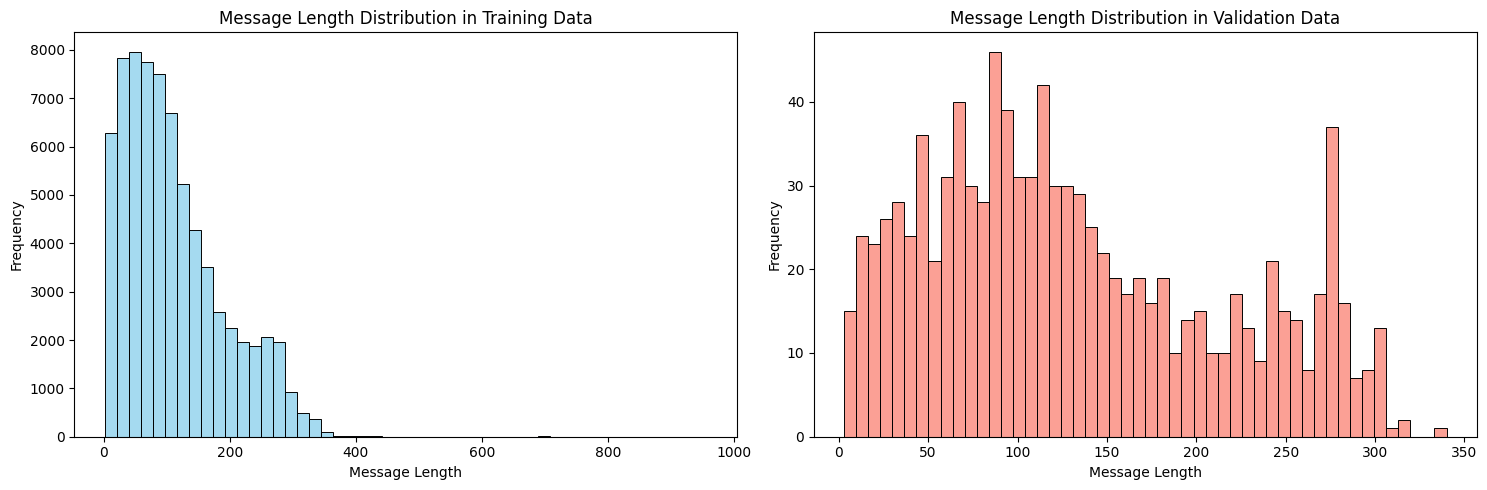

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

sns.histplot(y['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

C:\Users\Shreya Tripathy\AppData\Local\Temp\ipykernel_10832\4033863585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_cleaned, y=x_cleaned.columns[1], order=x_cleaned[x_cleaned.columns[1]].value_counts().index, palette='viridis')


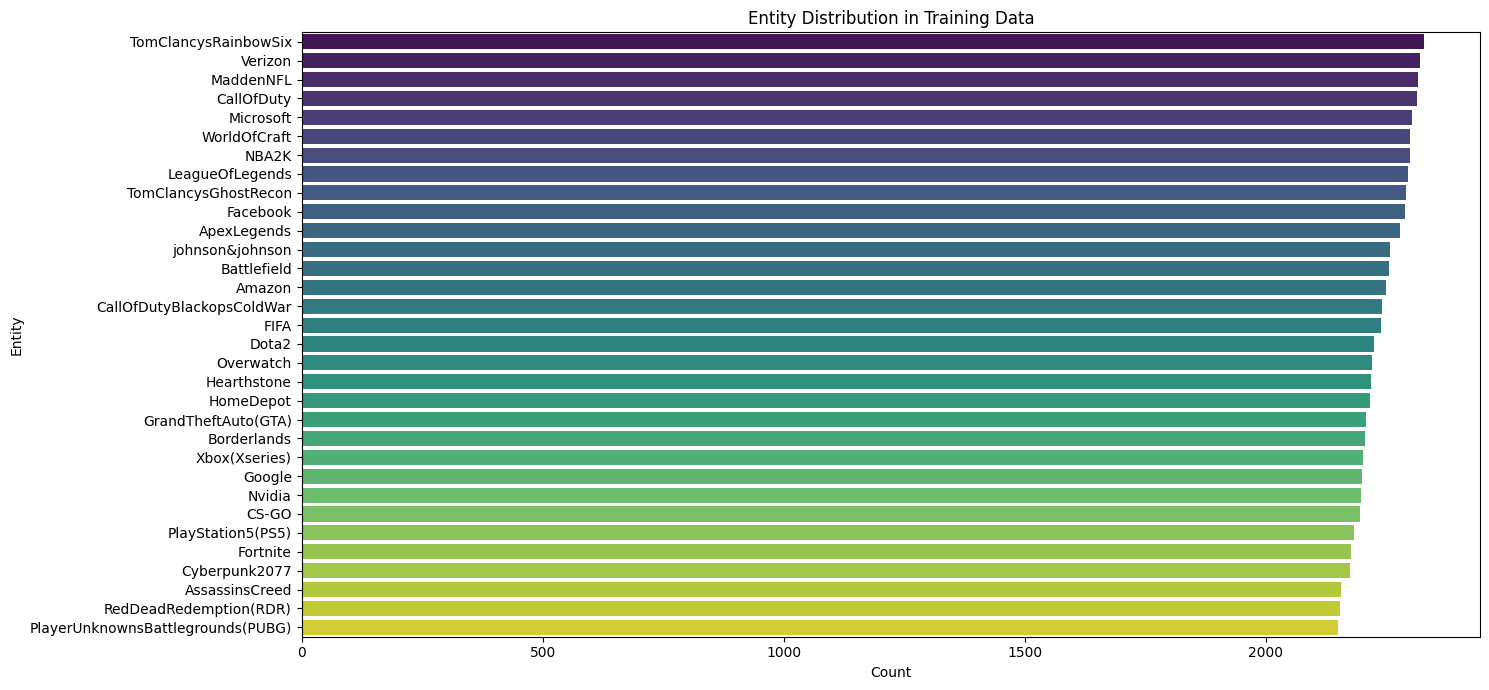

In [19]:
plt.figure(figsize=(15, 7))

sns.countplot(data=x_cleaned, y=x_cleaned.columns[1], order=x_cleaned[x_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [20]:
sentiment_types = y['Irrelevant'].value_counts()
sentiment_types

Irrelevant
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

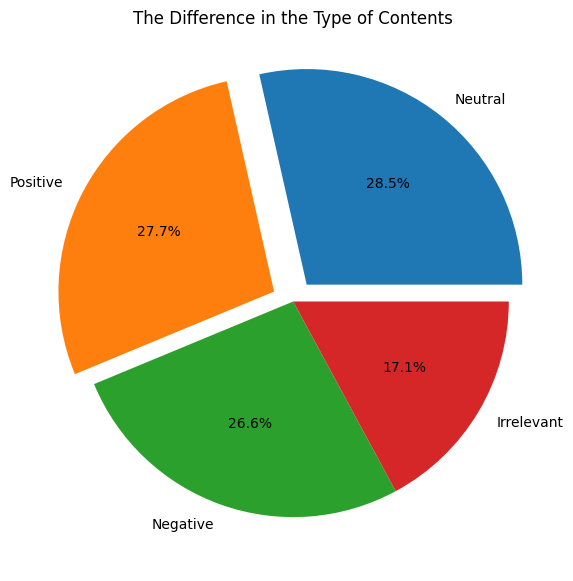

In [21]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

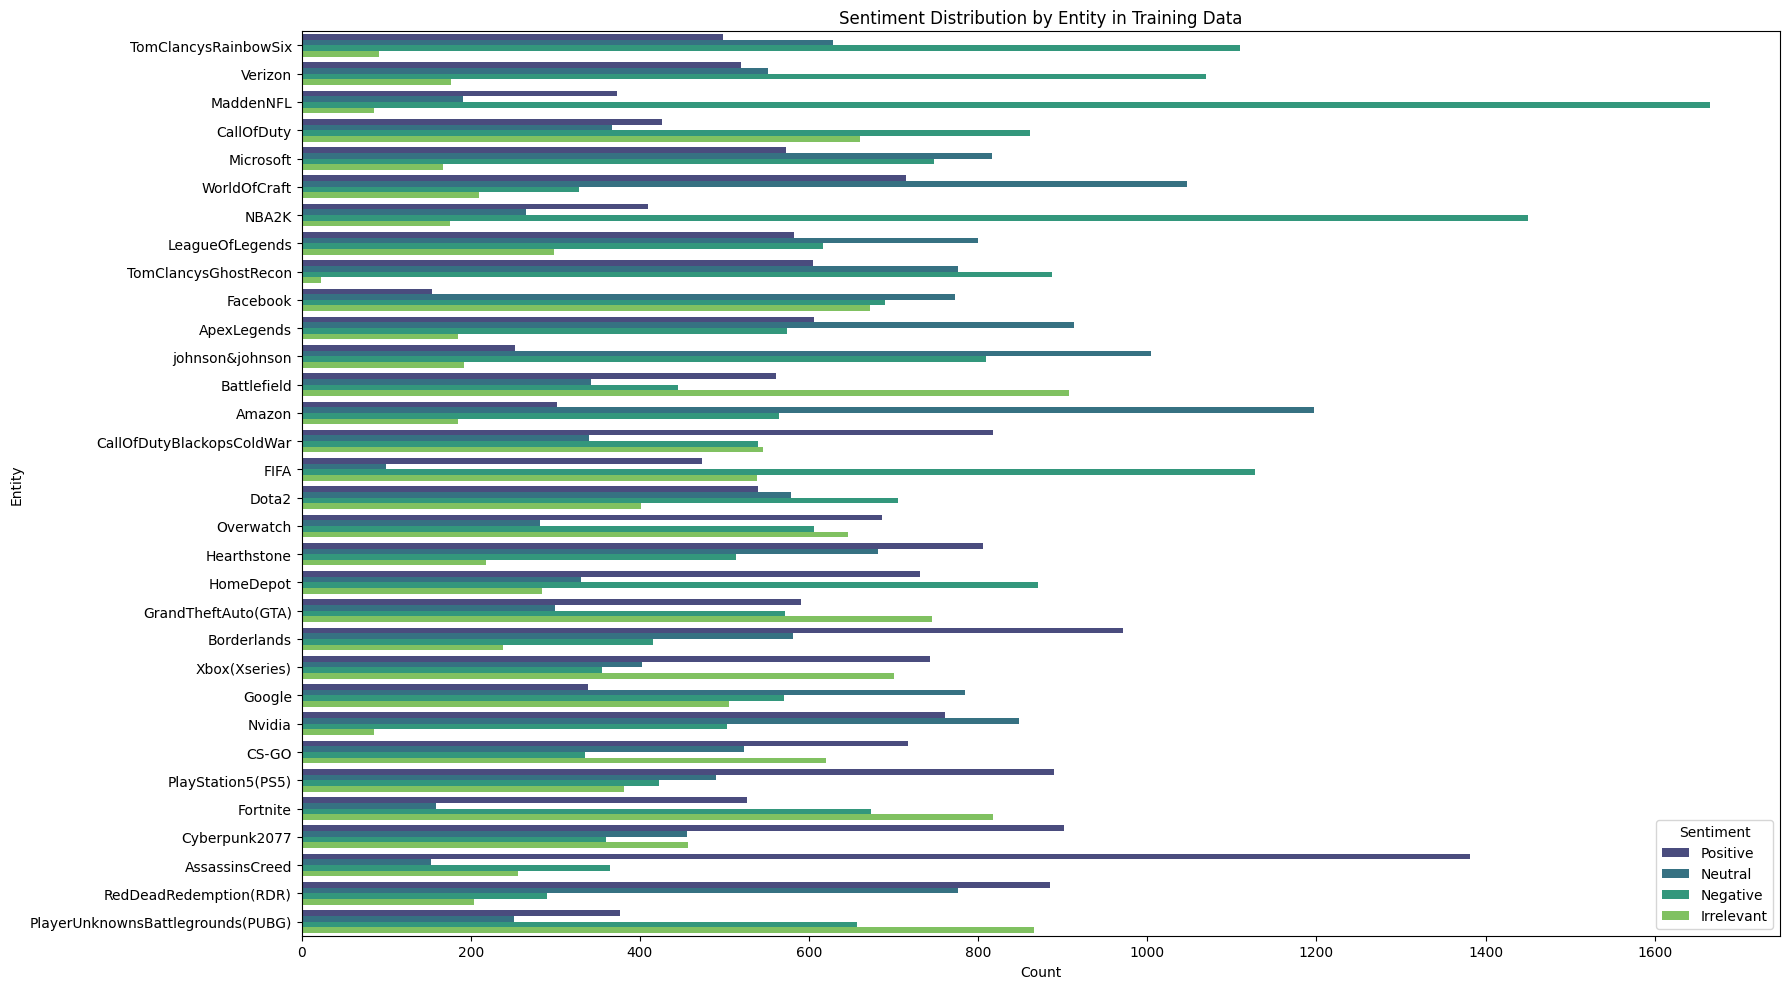

In [22]:
plt.figure(figsize=(18, 10))

sns.countplot(data=x_cleaned, y=x_cleaned.columns[1], hue=x_cleaned.columns[2], order=x_cleaned[x_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

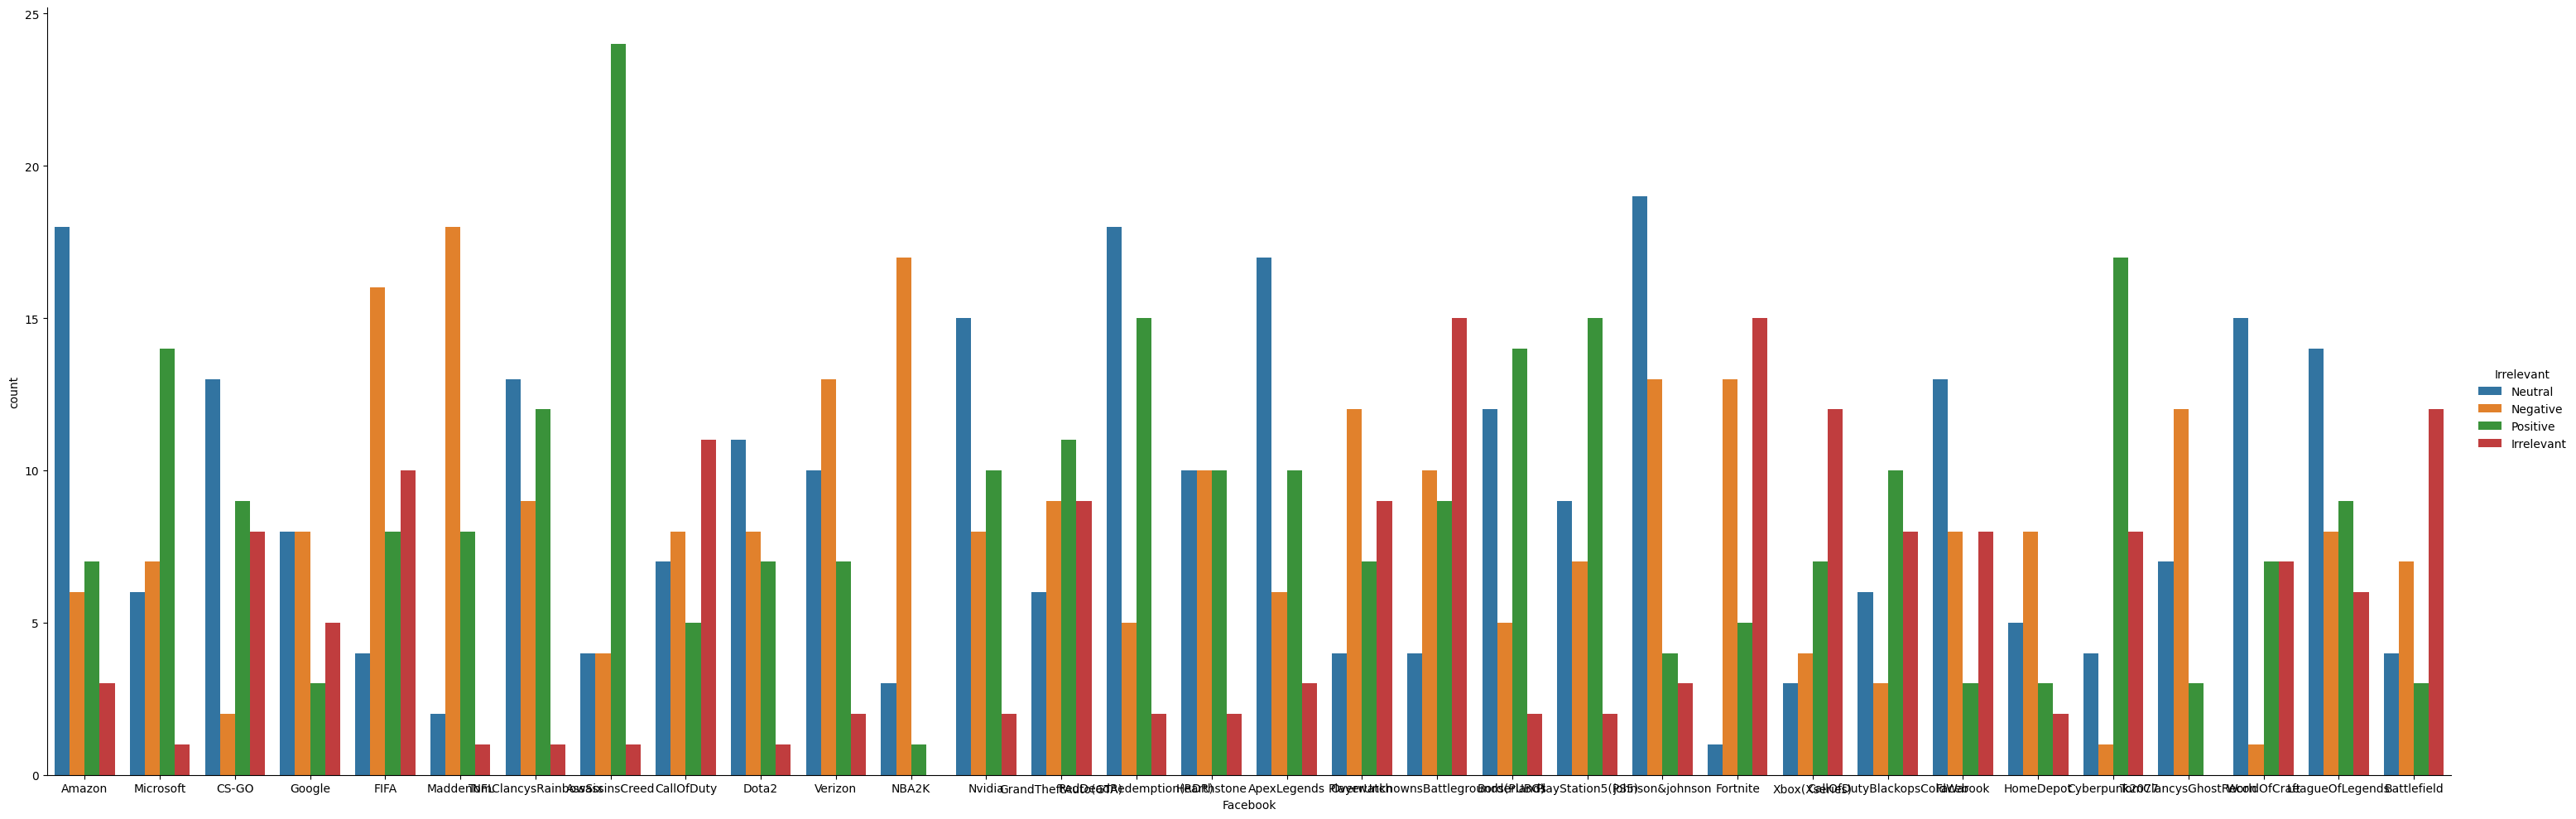

In [23]:
sns.catplot(x="Facebook",hue="Irrelevant", kind="count",height=10,aspect=3, data=y)

C:\Users\Shreya Tripathy\AppData\Local\Temp\ipykernel_10832\2602773130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=x_cleaned, x=x_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
C:\Users\Shreya Tripathy\AppData\Local\Temp\ipykernel_10832\2602773130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=y, x=y.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


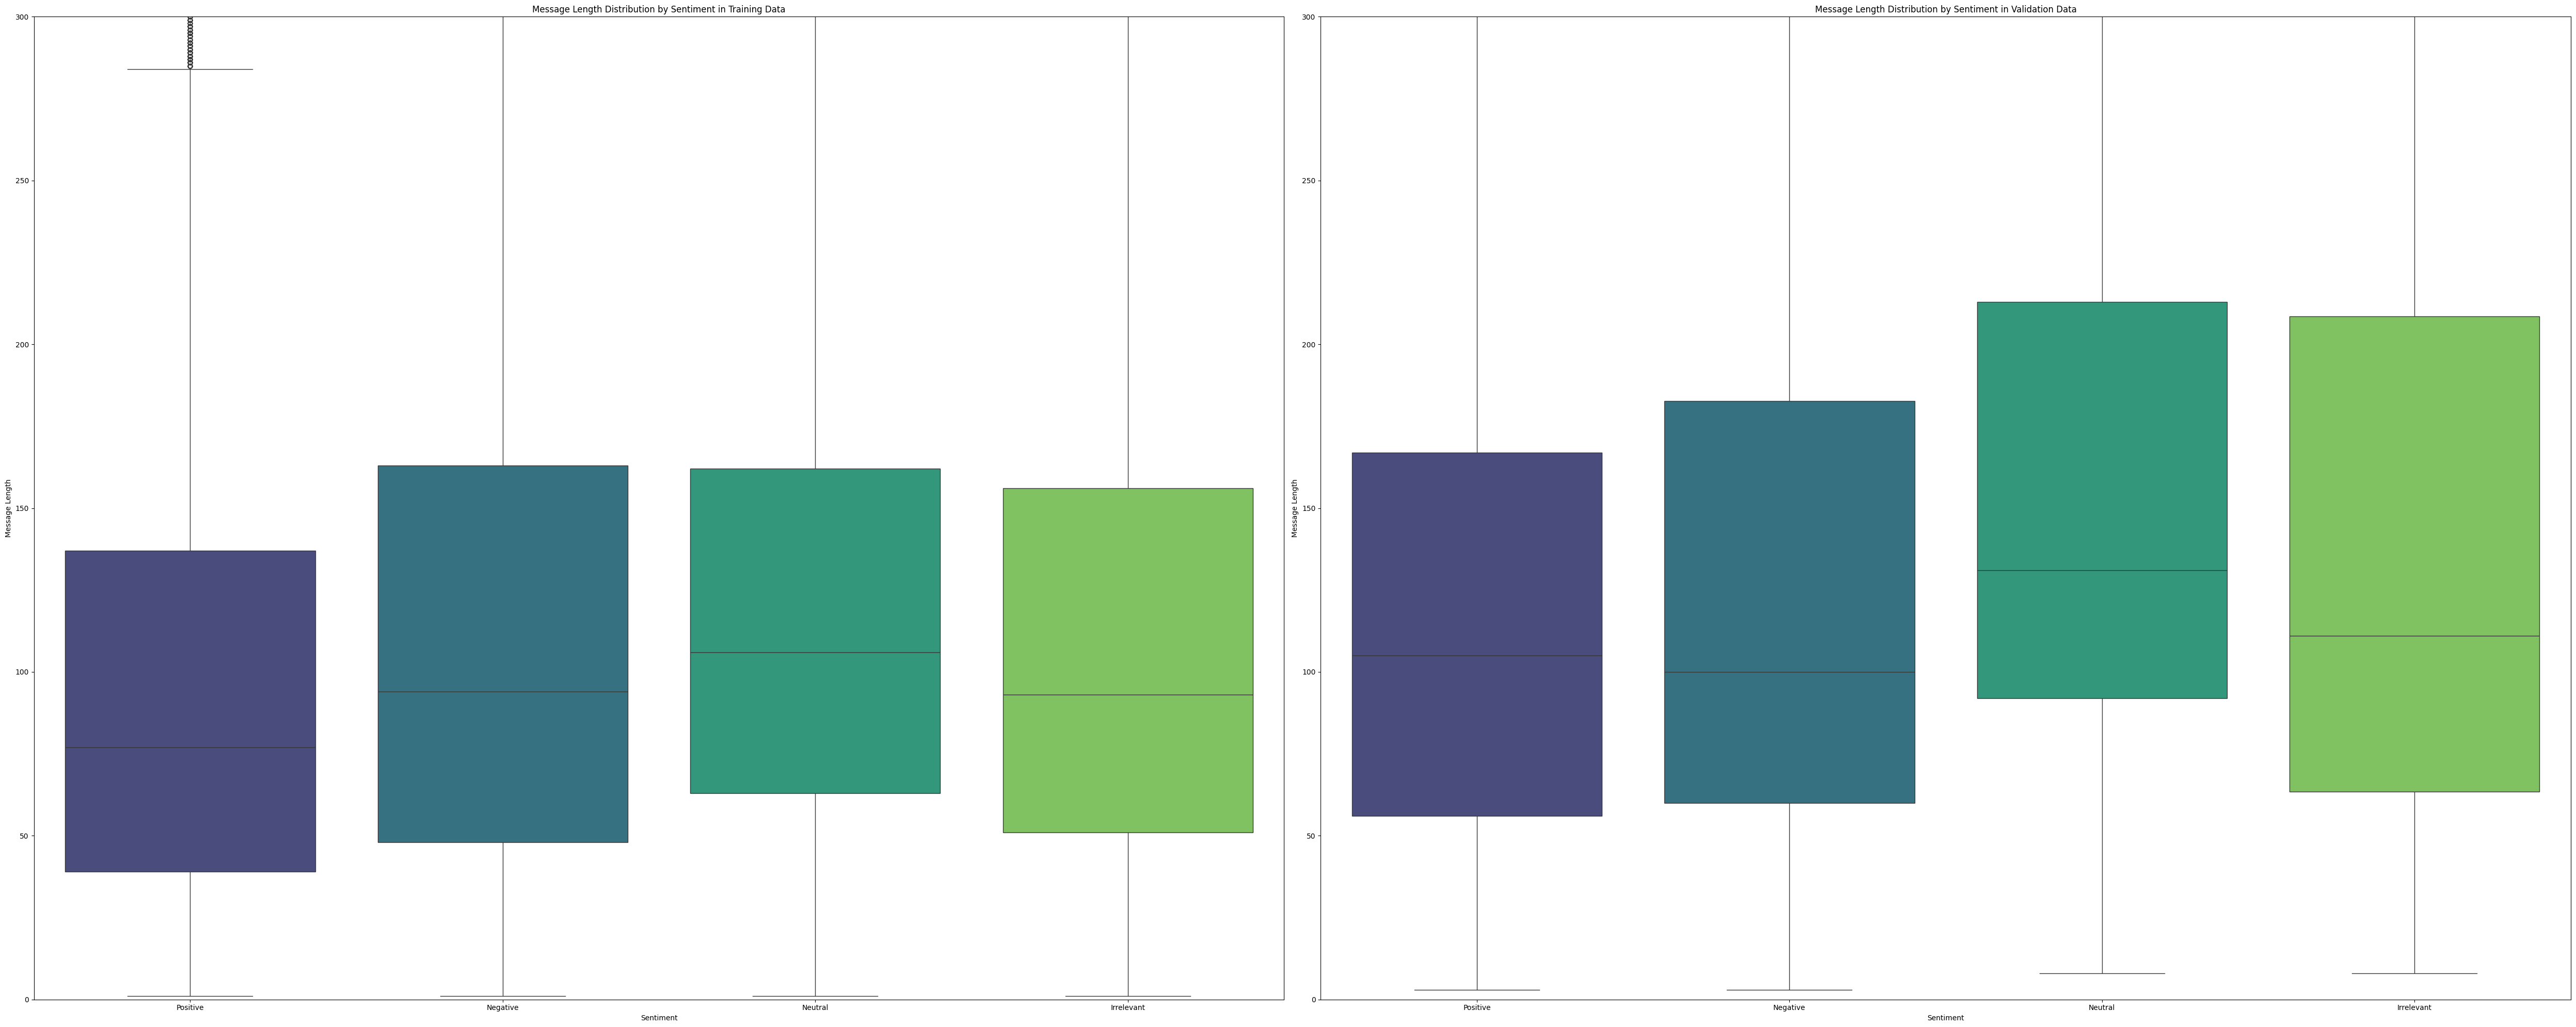

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(50, 20))

sns.boxplot(data=x_cleaned, x=x_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)

sns.boxplot(data=y, x=y.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()

In [ ]:
# END OF TASK-04